<a href="https://colab.research.google.com/github/03axdov/Notebooks/blob/main/Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tfds-nightly

     |████████████████████████████████| 4.7 MB 6.9 MB/s 


In [2]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print(f"Tensorflow version: {tf.__version__}")
print(f"Tensorflow datasets version: {tfds.__version__}")

Tensorflow version: 2.8.2
Tensorflow datasets version: 4.6.0+nightly


In [3]:
ds_preview, info = tfds.load('penguins/simple', split='train', with_info=True)
df = tfds.as_dataframe(ds_preview.take(5), info)
print(df)
print(info.features)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/344 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/penguins/simple/1.0.0.incompleteDSFGLE/penguins-train.tfrecord*...:   0%| …

Dataset penguins downloaded and prepared to /root/tensorflow_datasets/penguins/simple/1.0.0. Subsequent calls will reuse this data.
   body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  island  \
0       4200.0             13.9         45.500000              210.0       0   
1       4650.0             13.7         40.900002              214.0       0   
2       5300.0             14.2         51.299999              218.0       0   
3       5650.0             15.0         47.799999              215.0       0   
4       5050.0             15.8         46.299999              215.0       0   

   sex  species  
0    0        2  
1    0        2  
2    1        2  
3    1        2  
4    1        2  
FeaturesDict({
    'body_mass_g': tf.float32,
    'culmen_depth_mm': tf.float32,
    'culmen_length_mm': tf.float32,
    'flipper_length_mm': tf.float32,
    'island': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    'sex': ClassLabel(shape=(), dtype=tf.int64, num_classe

In [4]:
class_names = ['Adélie', 'Chinstrap', 'Gentoo']

In [5]:
ds_split, info = tfds.load("penguins/processed", split=['train[:20%]', 'train[20%:]'], as_supervised=True, with_info=True)
ds_test = ds_split[0]
ds_train = ds_split[1]
assert isinstance(ds_test, tf.data.Dataset)

print(info.features)
df_test = tfds.as_dataframe(ds_test.take(5), info)
print("Test dataset sample;")
print(df_test)

df_train = tfds.as_dataframe(ds_train.take(5), info)
print("Train dataset sample;")
print(df_train)

ds_train_batch = ds_train.batch(32)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/334 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/penguins/processed/1.0.0.incompleteD20YO0/penguins-train.tfrecord*...:   0…

Dataset penguins downloaded and prepared to /root/tensorflow_datasets/penguins/processed/1.0.0. Subsequent calls will reuse this data.
FeaturesDict({
    'features': Tensor(shape=(4,), dtype=tf.float32),
    'species': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
})
Test dataset sample;
                                         features  species
0  [0.6545454, 0.22619048, 0.89830506, 0.6388889]        2
1        [0.36, 0.04761905, 0.6440678, 0.4027778]        2
2       [0.68, 0.30952382, 0.91525424, 0.6944444]        2
3   [0.6181818, 0.20238096, 0.8135593, 0.6805556]        2
4  [0.5527273, 0.26190478, 0.84745765, 0.7083333]        2
Train dataset sample;
                                         features  species
0  [0.49818182, 0.6904762, 0.42372882, 0.4027778]        0
1      [0.48, 0.071428575, 0.6440678, 0.44444445]        2
2    [0.7236364, 0.9047619, 0.6440678, 0.5833333]        1
3  [0.34545454, 0.5833333, 0.33898306, 0.3472222]        0
4       [0.10909091, 0.75, 0.3559

In [6]:
features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.49818182 0.6904762  0.42372882 0.4027778 ]
 [0.48       0.07142857 0.6440678  0.44444445]
 [0.7236364  0.9047619  0.6440678  0.5833333 ]
 [0.34545454 0.5833333  0.33898306 0.3472222 ]
 [0.10909091 0.75       0.3559322  0.41666666]
 [0.6690909  0.63095236 0.47457626 0.19444445]
 [0.8036364  0.9166667  0.4915254  0.44444445]
 [0.4909091  0.75       0.37288135 0.22916667]
 [0.33454546 0.85714287 0.37288135 0.2361111 ]
 [0.32       0.41666666 0.2542373  0.1388889 ]
 [0.41454545 0.5952381  0.5084746  0.19444445]
 [0.14909092 0.48809522 0.2542373  0.125     ]
 [0.23636363 0.4642857  0.27118644 0.05555556]
 [0.22181818 0.5952381  0.22033899 0.3472222 ]
 [0.24727273 0.5595238  0.15254237 0.25694445]
 [0.63272727 0.35714287 0.88135594 0.8194444 ]
 [0.47272727 0.15476191 0.6440678  0.4722222 ]
 [0.6036364  0.23809524 0.84745765 0.7361111 ]
 [0.26909092 0.5595238  0.27118644 0.16666667]
 [0.28       0.71428573 0.20338982 0.5416667 ]
 [0.10545454 0.5714286  0.33898306 0.2847222 ]
 [

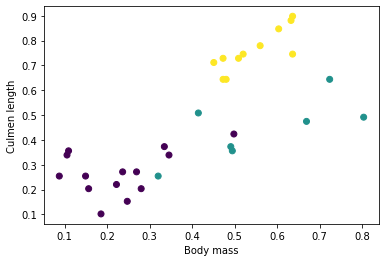

In [7]:
plt.scatter(
    features[:, 0],
    features[:, 2],
    c = labels,
    cmap='viridis'
)

plt.xlabel("Body mass")
plt.ylabel("Culmen length")
plt.show()

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=(4,)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(3)
])

In [9]:
predictions = model(features)
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.17833914, 0.5970524 , 0.22460836],
       [0.23496781, 0.5144558 , 0.25057644],
       [0.12993003, 0.69212604, 0.1779439 ],
       [0.20478608, 0.5478606 , 0.24735327],
       [0.19796611, 0.5574145 , 0.24461944]], dtype=float32)>

In [10]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [11]:
def loss(model, x, y, training):
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print(f"Loss test: {l}")

Loss test: 1.310042381286621


In [12]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)

  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [26]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [14]:
loss_value, grads = grad(model, features, labels)
print(f"Step: {optimizer.iterations.numpy()}, Initial loss: {loss_value}")

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print(f"Step: {optimizer.iterations.numpy()}    Loss: {loss(model, features, labels, training=True).numpy()}")

Step: 0, Initial loss: 1.310042381286621
Step: 1    Loss: 1.2490745782852173


In [27]:
train_loss_results = []
train_accuracy_results = []

EPOCHS = 201

import time
tic = time.time()
for epoch in range(EPOCHS):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  for x, y in ds_train_batch:
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    epoch_loss_avg.update_state(loss_value)
    epoch_accuracy.update_state(y, model(x, training=True))

  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print(f"Epoch: {epoch}, Loss: {epoch_loss_avg.result()}, Accuracy: {epoch_accuracy.result()}")

toc = time.time()
print(f"Time: {toc -tic}s")

Epoch: 0, Loss: 1.0668777227401733, Accuracy: 0.4157303273677826
Epoch: 50, Loss: 0.014319379813969135, Accuracy: 1.0
Epoch: 100, Loss: 0.0083870068192482, Accuracy: 1.0
Epoch: 150, Loss: 0.022291895002126694, Accuracy: 0.9925093650817871
Epoch: 200, Loss: 0.0070347776636481285, Accuracy: 0.9962546825408936
Time: 27.302461862564087s


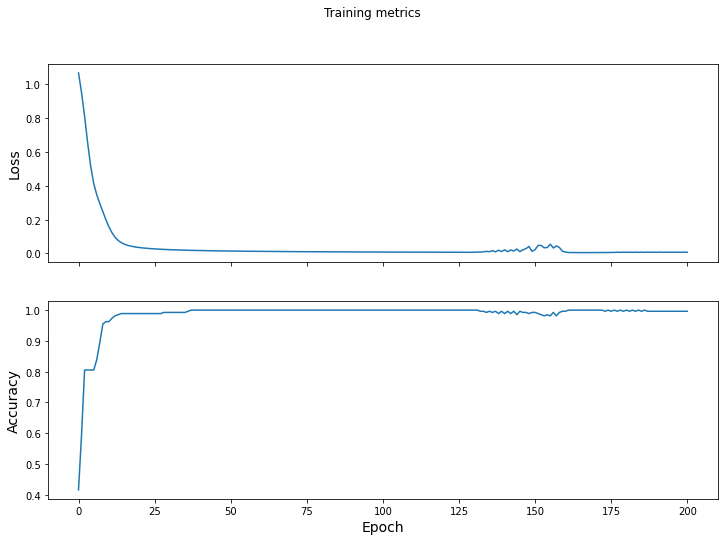

In [28]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)

plt.show()

In [37]:
print(len(list(ds_test)))

67


In [38]:
test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(67)

for (x, y) in ds_test_batch:
  logits = model(x, training=False)
  prediction = tf.math.argmax(logits, axis=1, output_type=tf.int64)
  test_accuracy(prediction, y)

print(f"Test set accuracy: {test_accuracy.result()}")

Test set accuracy: 1.0


In [ ]:
tf.stack([y, prediction], axis=1)